In [1]:
import torch
import torchvision
print(torch.__version__)

2.1.0


In [2]:
import sklearn
from sklearn.datasets import make_circles

#make a 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                   random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"first 5 samples of X:\n {X[:5]}")
print(f"first 5 samples of X:\n {y[:5]}")

first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of X:
 [1 1 1 1 0]


In [5]:
# Make DAtraframe of circles data

import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                       "label": y})

In [6]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


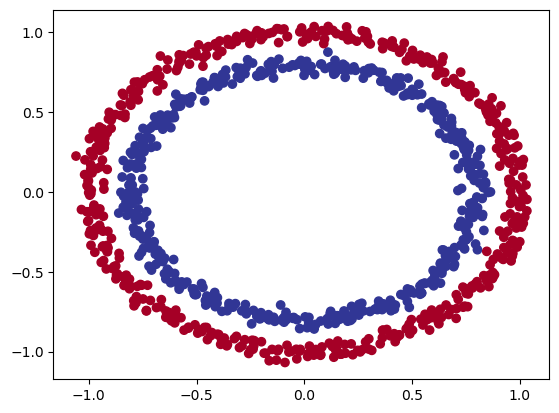

In [7]:
# Visulize, 
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [8]:
# Check input and output shapes

X.shape, y.shape

((1000, 2), (1000,))

In [9]:
x_sample = X[0]
y_sample = y[0]
x_sample, y_sample, x_sample.shape, y_sample.shape

(array([0.75424625, 0.23148074]), 1, (2,), ())

In [10]:
# Turn Data into Tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [11]:
device = "cuda" if torch.cuda.is_available else "cpu"

In [12]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [13]:
len(X_train), len(X_test)

(800, 200)

In [14]:
X_train.device

device(type='cpu')

In [15]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [16]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [17]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=X_train.shape[1], out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    def forward(self, x):
        return self.layer_2(self.layer_1(x))
model_0 = CircleModel().to(device)

In [18]:
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=X_train.shape[1], out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )
    def forward(self, x):
        return self.two_linear_layers(x)
model_0 = CircleModel().to(device)

In [20]:
model_0

CircleModel(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [21]:
next(model_0.parameters()).device

device(type='cpu')

In [22]:
model_0 = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1], out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model_0 = model_0.to(device)

In [23]:
# make some predictions with model
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2328, -0.6512],
                      [-0.6269, -0.4626],
                      [-0.2399, -0.5605],
                      [ 0.3074,  0.0151],
                      [ 0.6286, -0.5779]])),
             ('0.bias', tensor([-0.4677, -0.5097,  0.0066, -0.4311,  0.4031])),
             ('1.weight',
              tensor([[ 0.1082, -0.4231,  0.2171, -0.1049,  0.3931]])),
             ('1.bias', tensor([-0.0752]))])

In [24]:
with torch.inference_mode():
    untrained_predictions = model_0(X_test.to(device))

In [25]:
# untrained_predictions
print(f"\nLength od Predictions: {len(untrained_predictions)}, shape: {untrained_predictions.shape}")
print(f"\nLegnth of test samples: {len(y_test)}, shape: {y_test.shape}")
print(f"\n First 10 Predictions:\n {untrained_predictions[:10]}")
print(f"\n First 10 lables:\n {y_test[:10]}")


Length od Predictions: 200, shape: torch.Size([200, 1])

Legnth of test samples: 200, shape: torch.Size([200])

 First 10 Predictions:
 tensor([[-0.0288],
        [ 0.0857],
        [ 0.0473],
        [-0.0520],
        [ 0.6448],
        [ 0.7101],
        [ 0.5590],
        [ 0.7068],
        [ 0.0220],
        [ 0.1000]])

 First 10 lables:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [26]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr = 0.1)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [27]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0288],
        [ 0.0857],
        [ 0.0473],
        [-0.0520],
        [ 0.6448]])

In [28]:
pred = torch.round(torch.sigmoid(model_0(X_train.to(device))[:5]))
pred

tensor([[1.],
        [1.],
        [0.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)

In [29]:
# Training Loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
Epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(f"Epoch: | Training Loss: | Training Accuracy: | Test Accuracy | Test Loss: ")
for epoch in range(Epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_train, pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
    
    
    if (epoch%10==0):
        print(f"{epoch} |\t {loss:.3f} |\t {accuracy:.3f}% |\t {test_acc:.2f}% |\t {test_loss:.3f}")
    

Epoch: | Training Loss: | Training Accuracy: | Test Accuracy | Test Loss: 
0 |	 0.717 |	 53.000% |	 53.50% |	 0.713
10 |	 0.706 |	 50.750% |	 56.00% |	 0.704
20 |	 0.701 |	 50.500% |	 53.50% |	 0.700
30 |	 0.699 |	 50.000% |	 53.00% |	 0.698
40 |	 0.697 |	 50.000% |	 51.50% |	 0.697
50 |	 0.696 |	 49.750% |	 51.50% |	 0.696
60 |	 0.695 |	 49.625% |	 50.50% |	 0.696
70 |	 0.695 |	 49.625% |	 51.00% |	 0.696
80 |	 0.694 |	 49.750% |	 51.00% |	 0.695
90 |	 0.694 |	 49.750% |	 52.50% |	 0.695


In [31]:
import requests
from pathlib import Path

#Download HElper function from learn pytorch github 
if Path("helper_functions.py").is_file():
    print("helper function a;lready exists")
else:
    print("Doenload the helper fuunction ")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary

helper function a;lready exists


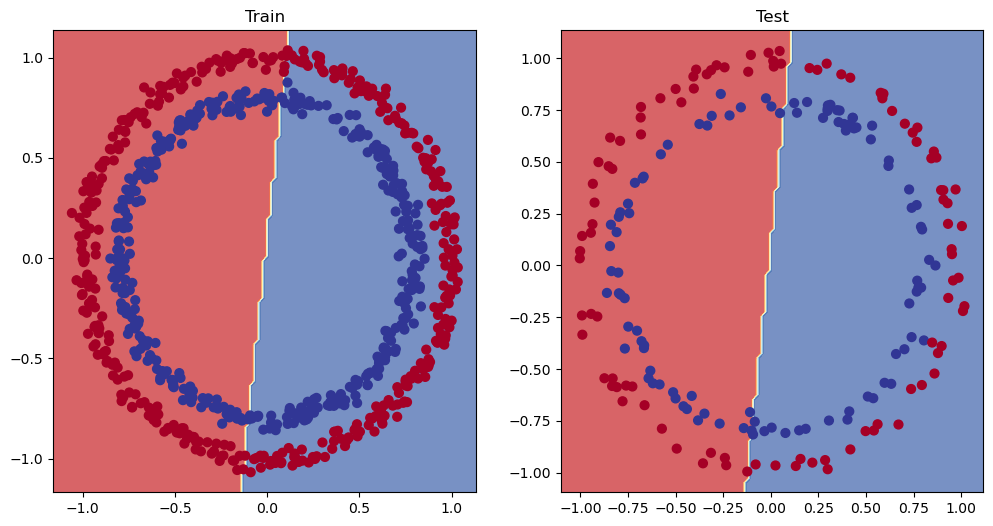

In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/08/aa/033a0a1bca4a3b8f81f97709024e053da37cf5c970f3dc5d76233c920b99/torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
  Obtaining dependency information for torch==2.1.0 from https://files.pythonhosted.org/packages/5b/13/fcabc86948f9e89b62a538670720f8589d63f93d3f4f3d172236a98e70f8/torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Obtaining dependency information for nvidia-cudnn-cu12==8.9.2.26 from https://files.pythonhosted.org/packages/ff/74/a2e2be7fb